In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
# Get the current working directory
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)


# ignore warrnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from DB_connection.connection import PostgresConnection
from scripts.engagement_analyser import EngagementAnalyzer

In [3]:
db=PostgresConnection()
db.connect()

Connected to PostgreSQL database


In [4]:
query='select * from xdr_data'
db.execute_query(query)

Query executed successfully


In [5]:
df=db.fetch_data(query)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
engagement_analyser=EngagementAnalyzer(df)
engagement_analyser.user_engagement(df)

,MSISDN/Number,Session Frequency,Total Session Duration (ms),Total UL (Bytes),Total DL (Bytes)
0,3.360100e+10,1,116720.0,36053108.0,8.426375e+08
1,3.360100e+10,1,181230.0,36104459.0,1.207552e+08
2,3.360100e+10,1,134969.0,39306820.0,5.566597e+08
3,3.360101e+10,1,49878.0,20327526.0,4.019932e+08
4,3.360101e+10,2,37104.0,94280527.0,1.363130e+09
...,...,...,...,...,...
106851,3.379000e+10,1,8810.0,26716429.0,6.879252e+08
106852,3.379000e+10,1,140988.0,35732243.0,4.445751e+08
106853,3.197021e+12,1,877385.0,37295915.0,1.948281e+08
106854,3.370000e+14,1,253030.0,56652839.0,5.396350e+08


In [7]:
engagement_analyser.high_engagement_users(df)

,MSISDN/Number,Session Frequency,Total Session Duration (ms),Total UL (Bytes),Total DL (Bytes)
33,3.360106e+10,2,329753.0,93715624.0,1.356137e+09
121,3.360125e+10,3,532948.0,141294920.0,1.334793e+09
133,3.360127e+10,5,459818.0,171891831.0,1.751269e+09
147,3.360128e+10,4,361104.0,164301781.0,1.759794e+09
181,3.360135e+10,3,366762.0,131344904.0,1.291056e+09
...,...,...,...,...,...
106683,3.378859e+10,5,1468844.0,219653168.0,1.664957e+09
106726,3.378905e+10,3,405388.0,109471806.0,1.993635e+09
106758,3.378944e+10,4,987178.0,205801366.0,1.953776e+09
106823,3.378977e+10,3,491169.0,148243207.0,2.062120e+09


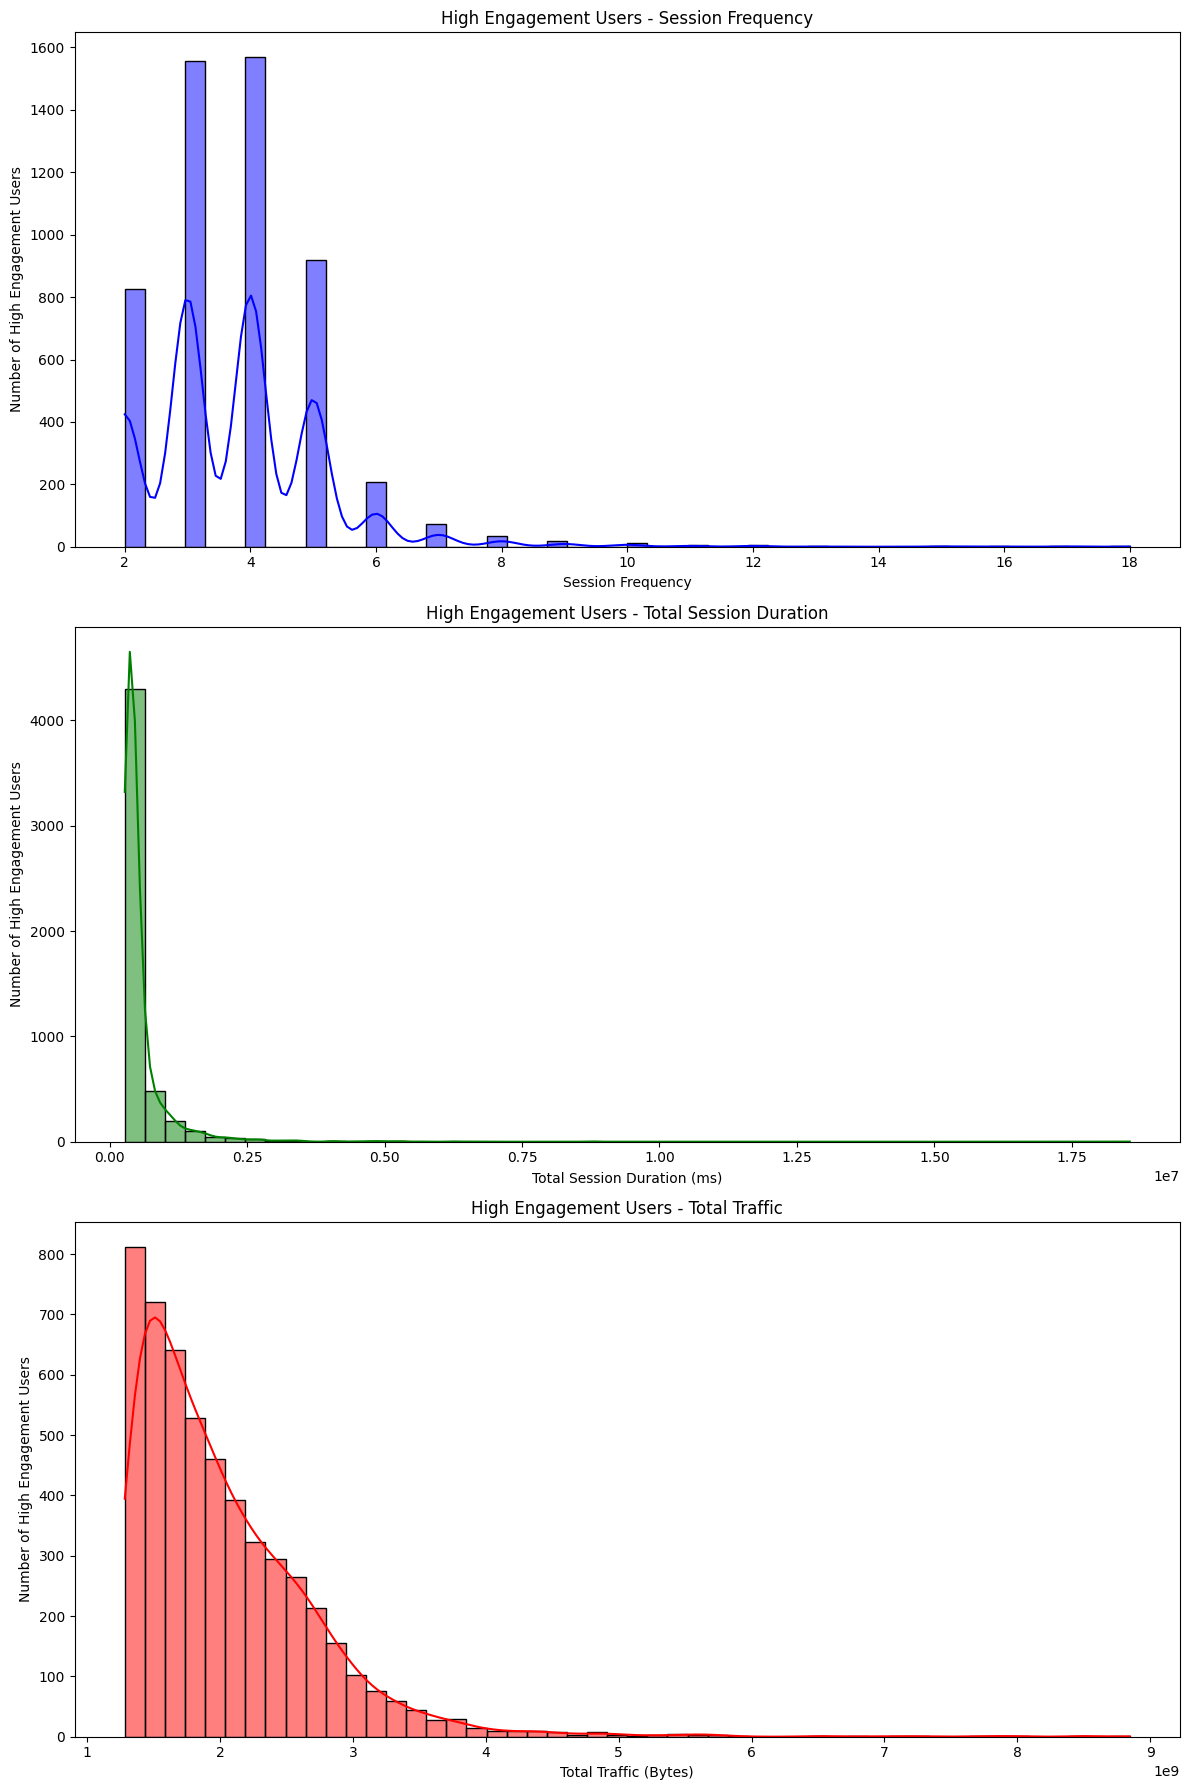

In [8]:
engagement_analyser.plot_user_engagement(df)

In [9]:
engagement_analyser.top_10_users_per_metric(df)

Top 10 Users by Session Frequency:
        MSISDN/Number  Session Frequency  Total Session Duration (ms)  \
13526   3.362632e+10                 18                    8791927.0   
6437    3.361489e+10                 17                    9966898.0   
13180   3.362578e+10                 17                   18553754.0   
37052   3.365973e+10                 16                    4035428.0   
76363   3.367588e+10                 15                    4865947.0   
92923   3.376054e+10                 15                    9279434.0   
65118   3.366716e+10                 13                    8744914.0   
666     3.360313e+10                 12                    6287761.0   
1279    3.360452e+10                 12                    5207990.0   
13994   3.362708e+10                 12                    4703516.0   

       Total UL (Bytes)  Total DL (Bytes)  Total Traffic (Bytes)  
13526       669650721.0      7.301517e+09           7.971167e+09  
6437        689483001.0      8.156743

In [11]:
import pandas as pd
df['Total Duration']=df['Total UL (Bytes)']+df['Total DL (Bytes)']
# Assume df is the DataFrame containing the dataset
engagement_df = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # This will give us the number of sessions per user
    'Total Duration': 'sum',  # Total duration of all sessions
    'Total UL (Bytes)': 'sum',  # Total upload bytes
    'Total DL (Bytes)': 'sum',  # Total download bytes
}).reset_index()

# Calculate the total traffic per user
engagement_df['Total Traffic (Bytes)'] = engagement_df['Total UL (Bytes)'] + engagement_df['Total DL (Bytes)']

# Rename columns for better understanding
engagement_df.rename(columns={'Bearer Id': 'Session Frequency'}, inplace=True)

# Top 10 customers per engagement metric
top10_sessions = engagement_df.nlargest(10, 'Session Frequency')
top10_duration = engagement_df.nlargest(10, 'Total Duration')
top10_traffic = engagement_df.nlargest(10, 'Total Traffic (Bytes)')


In [12]:
# Selecting only the relevant columns for normalization
metrics = ['Session Frequency', 'Total Duration', 'Total Traffic (Bytes)']
scaler = MinMaxScaler()
engagement_df[metrics] = scaler.fit_transform(engagement_df[metrics])

# Applying K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_df['Engagement Cluster'] = kmeans.fit_predict(engagement_df[metrics])


  File "e:\Kiffya_10_acc\Week 2\TellCo-Telecom-Analysis\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Getahun\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Getahun\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Getahun\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [20]:
engagement_df

,MSISDN/Number,Session Frequency,Total Duration,Total UL (Bytes),Total DL (Bytes),Total Traffic (Bytes),Engagement Cluster
0,3.360100e+10,0.055556,0.095931,36053108.0,8.426375e+08,0.095931,2
1,3.360100e+10,0.055556,0.014026,36104459.0,1.207552e+08,0.014026,0
2,3.360100e+10,0.055556,0.063851,39306820.0,5.566597e+08,0.063851,0
3,3.360101e+10,0.055556,0.044148,20327526.0,4.019932e+08,0.044148,0
4,3.360101e+10,0.111111,0.161598,94280527.0,1.363130e+09,0.161598,2
...,...,...,...,...,...,...,...
106851,3.379000e+10,0.055556,0.077317,26716429.0,6.879252e+08,0.077317,2
106852,3.379000e+10,0.055556,0.050727,35732243.0,4.445751e+08,0.050727,0
106853,3.197021e+12,0.055556,0.022566,37295915.0,1.948281e+08,0.022566,0
106854,3.370000e+14,0.055556,0.063887,56652839.0,5.396350e+08,0.063887,0


In [13]:
# Re-attach non-normalized metrics to engagement_df
non_normalized_df = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',
    'Total Duration': 'sum',
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum',
}).reset_index()

non_normalized_df['Total Traffic (Bytes)'] = non_normalized_df['Total UL (Bytes)'] + non_normalized_df['Total DL (Bytes)']
non_normalized_df.rename(columns={'Bearer Id': 'Session Frequency'}, inplace=True)

# Merge cluster assignments
cluster_metrics = pd.merge(non_normalized_df, engagement_df[['MSISDN/Number', 'Engagement Cluster']], on='MSISDN/Number')

# Calculate statistics for each cluster
cluster_summary = cluster_metrics.groupby('Engagement Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Duration': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
}).reset_index()


In [19]:
cluster_summary

Engagement Cluster Session Frequency                      Total Duration  \
                                   min max      mean    sum            min   
0                  0                 0   3  1.040668  58114   3.324901e+07   
1                  1                 1  18  3.507854  26351   1.080364e+09   
2                  2                 0   4  1.472173  64041   4.551713e+08   

                                            Total Traffic (Bytes)  \
            max          mean           sum                   min   
0  7.507230e+08  3.667982e+08  2.048311e+13          3.324901e+07   
1  8.846226e+09  1.954625e+09  1.468315e+13          1.080364e+09   
2  1.553585e+09  8.888804e+08  3.866719e+13          4.551713e+08   

                                             
            max          mean           sum  
0  7.507230e+08  3.667982e+08  2.048311e+13  
1  8.846226e+09  1.954625e+09  1.468315e+13  
2  1.553585e+09  8.888804e+08  3.866719e+13

##### Aggregate User Total Traffic per Application and Derive the Top 10 Most Engaged Users per Application

In [28]:
# List of application columns
applications = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
                'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
                'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)']

# Aggregate traffic per user per application
app_engagement = df.groupby('MSISDN/Number')[applications].sum().reset_index()

# Total traffic per application
for app in applications:
    app_engagement[app.replace(' (Bytes)', ' Total (Bytes)')] = app_engagement[app]
app_engagement['Social Media Total (Bytes)'] = app_engagement['Social Media DL Total (Bytes)']+app_engagement['Social Media UL Total (Bytes)']
# Example: Top 10 users for Social Media traffic
top10_social_media_users = app_engagement.nlargest(10, 'Social Media Total (Bytes)')


In [29]:
top10_social_media_users

,MSISDN/Number,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),...,Google UL Total (Bytes),Email DL Total (Bytes),Email UL Total (Bytes),Youtube DL Total (Bytes),Youtube UL Total (Bytes),Netflix DL Total (Bytes),Netflix UL Total (Bytes),Gaming DL Total (Bytes),Gaming UL Total (Bytes),Social Media Total (Bytes)
13526,3.362632e+10,42743837.0,630942.0,116106455.0,36085397.0,33404785.0,9013997.0,164048706.0,210434341.0,199479238.0,...,36085397.0,33404785.0,9013997.0,164048706.0,210434341.0,199479238.0,129246502.0,6.745734e+09,141838597.0,43374779.0
92923,3.376054e+10,39297646.0,485543.0,88626532.0,34596567.0,26437895.0,7255872.0,194068298.0,202220900.0,146500839.0,...,34596567.0,26437895.0,7255872.0,194068298.0,202220900.0,146500839.0,188142430.0,7.316364e+09,144681056.0,39783189.0
37052,3.365973e+10,34900444.0,511914.0,90958549.0,25557796.0,29907647.0,6092145.0,119658146.0,138332942.0,196277206.0,...,25557796.0,29907647.0,6092145.0,119658146.0,138332942.0,196277206.0,203241873.0,6.609900e+09,115658741.0,35412358.0
6437,3.361489e+10,27749744.0,544800.0,93941708.0,34032079.0,33607211.0,7181423.0,199823443.0,194546775.0,179585986.0,...,34032079.0,33607211.0,7181423.0,199823443.0,194546775.0,179585986.0,181815060.0,7.622035e+09,127396833.0,28294544.0
13180,3.362578e+10,26564121.0,571379.0,107904739.0,34403176.0,31895412.0,8738554.0,237883033.0,215075736.0,193912238.0,...,34403176.0,31895412.0,8738554.0,237883033.0,215075736.0,193912238.0,163068369.0,7.171884e+09,154789688.0,27135500.0
65118,3.366716e+10,23753753.0,494097.0,71707826.0,33324870.0,23276752.0,7059044.0,141972692.0,173258618.0,167932406.0,...,33324870.0,23276752.0,7059044.0,141972692.0,173258618.0,167932406.0,146007082.0,4.623424e+09,102197663.0,24247850.0
106137,3.378632e+10,23568655.0,406264.0,78819810.0,31434674.0,30876908.0,5433215.0,118129859.0,96634053.0,163602702.0,...,31434674.0,30876908.0,5433215.0,118129859.0,96634053.0,163602702.0,142337088.0,4.740903e+09,110192303.0,23974919.0
70960,3.366907e+10,23477047.0,323787.0,54915216.0,22909468.0,17813584.0,5109829.0,136295265.0,100107539.0,78923699.0,...,22909468.0,17813584.0,5109829.0,136295265.0,100107539.0,78923699.0,133085331.0,3.166462e+09,102690051.0,23800834.0
666,3.360313e+10,22776679.0,301146.0,73942055.0,12986961.0,20343728.0,5855167.0,158976704.0,125113435.0,156086546.0,...,12986961.0,20343728.0,5855167.0,158976704.0,125113435.0,156086546.0,104401875.0,4.108482e+09,82962892.0,23077825.0
31331,3.365849e+10,22695673.0,304393.0,55457602.0,20976541.0,15004556.0,4673135.0,64799443.0,118464776.0,78217369.0,...,20976541.0,15004556.0,4673135.0,64799443.0,118464776.0,78217369.0,108576562.0,2.071045e+09,54024030.0,23000066.0


##### Plot the Top 3 Most Used Applications Using Appropriate Charts

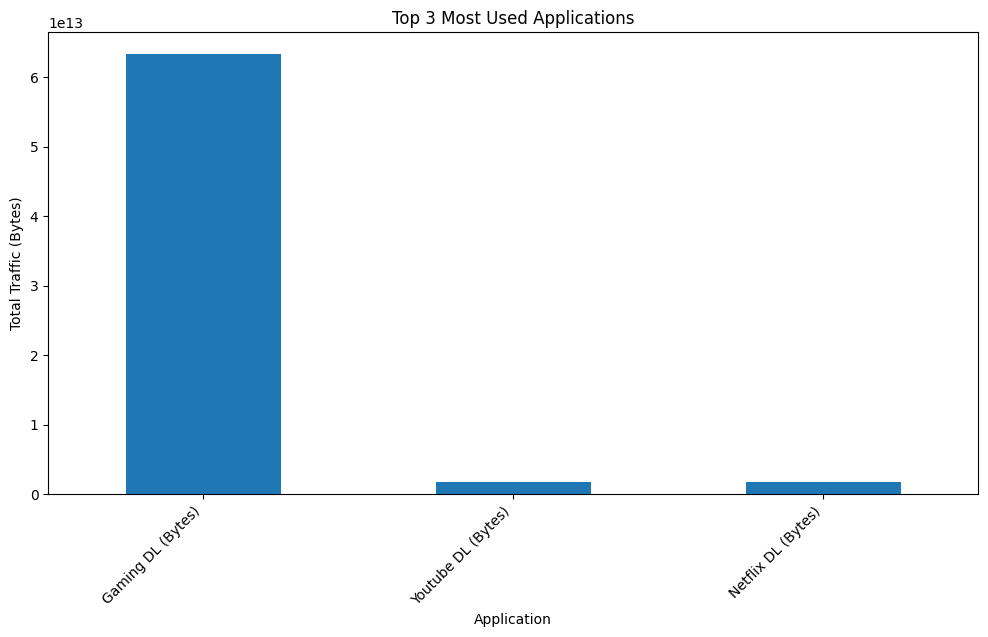

In [30]:
# Sum up total traffic for each application
app_usage = df[applications].sum().sort_values(ascending=False)

# Plot the top 3 applications
top_3_apps = app_usage.head(3)
plt.figure(figsize=(12, 6))
top_3_apps.plot(kind='bar', title='Top 3 Most Used Applications')
plt.ylabel('Total Traffic (Bytes)')
plt.xlabel('Application')
plt.xticks(rotation=45, ha='right')
plt.show()

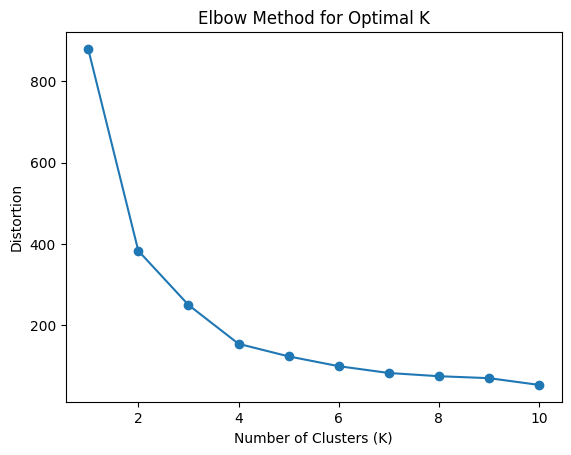

In [31]:
# Determine optimal k using the Elbow Method
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(engagement_df[metrics])
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.show()

### Optimal Clusters

The elbow method graph suggests that the optimal number of clusters k is around 3 or 4. This is where the distortion sharply decreases and then starts to level off, indicating diminishing returns for additional clusters.

### Interpretation of Findings

1. **Clusters**:
   - **Low Engagement**: Users with minimal session frequency, duration, and data usage.
   - **Medium Engagement**: Users with moderate interaction across metrics.
   - **High Engagement**: Users with frequent sessions and high data consumption.

2. **Implications**:
   - **Targeted Marketing**: Tailor offers to different engagement levels.
   - **Resource Allocation**: Focus on high engagement areas.

3. **Insights**:
   - Enhance user experience by understanding diverse user needs.

#### end!